<a href="https://www.kaggle.com/code/narendranathedara/supervised-learning?scriptVersionId=165621643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification

## Evaluation Methods

Before we get started coding, it's important to discuss <strong>evaluation techniques to review model performance.</strong>

The angle of evaluation depends on the scope of your model, and specifically, whether it is a classification or regression model.

In the case of classification, common evaluation methods include the <strong> confusion matrix, classification report, and accuracy score.</strong>

## 1) Accuracy Score
This is a simple metric measuring how many cases the model classified correctly divided by the number of cases. If all predictions are correct, the accuracy score is 1.0, and 0 when all predicted cases are wrong.

## 2) Confusion Matrix
A confusion matrix, also known as an error matrix, is a simple table that summarizes the performance of the model, including the number of false-positives and false-negatives.

## 3) Classification Report
Another popular classification technique is the classification report, which generates three evaluation metrics.

<strong> Precision </strong> is the ratio of correctly predicted true-positives to the total of predicted positive cases. A high precision score translates to a low number of false-positives. 

<strong> Recall </strong>  is the ratio of correctly predicted true-positives to the total of actual positive cases. This metric addresses the question of how many positive outcomes were rightly classified as positive?

<strong> F1-score </strong> is a weighted average of precision and recall. It’s typically used as a metric for model-to-model comparison rather than internal model accuracy. In addition, the f1-score is generally lower than the accuracy score due to the way recall and precision are calculated.

<strong> Support </strong>  is not an evaluation metric per se but rather a tally of the number of positive and negative cases respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/housing-in-london/housing_in_london_yearly_variables.csv')

# Preprocess the data: remove null values and replace empty cells with 0
data_filled = data.fillna(0)

# Display the first few rows of the cleaned data to understand its structure
print(data_filled.head())

        code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                0.0       48922             0           6581.0   
1                0.0       23620             3         162444.0   
2                0.0       23128             8         313469.0   
3                0.0       21386            18         217458.0   
4                0.0       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             0.0        0.0           0.0             1  
1             0.0        0.0           0.0             1  
2             0.0        0.0 

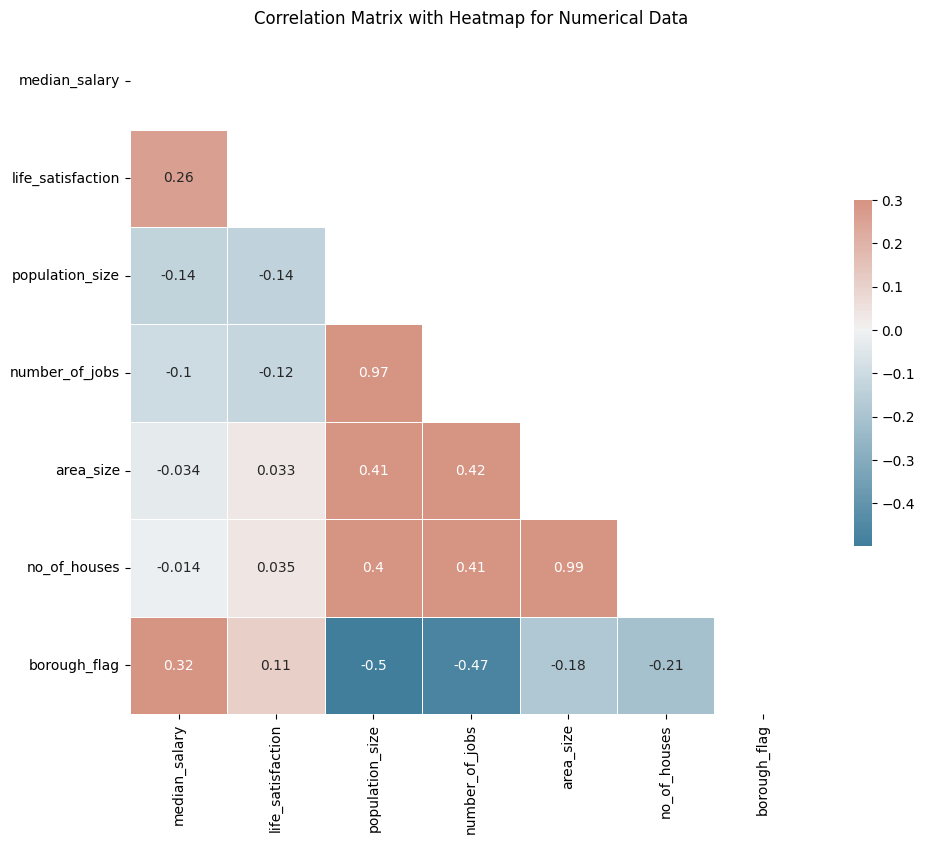

In [2]:
# Before conversion, let's drop any non-numeric columns that won't be useful for correlation analysis
df_numerical = data_filled.select_dtypes(include=[np.number])

# If there were categorical columns that needed conversion, we would use the following method
df_with_dummies = pd.get_dummies(data_filled, columns=['code', 'area'])

# Now, let's calculate the correlation matrix for the numerical data
correlation_matrix_numerical = df_numerical.corr()

# Plotting the correlation matrix with a heatmap
mask = np.triu(np.ones_like(correlation_matrix_numerical, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix_numerical, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix with Heatmap for Numerical Data')
plt.show()


From the correlation matrix we can see a strong correlation between number_of_jobs to that of the population_size

### target variable for classification is "mean salary" and the feature used for prediction is "population size"

#### we'll proceed with the following steps:

1.Convert "mean salary" into a categorical variable, as it is likely continuous and we need it to be categorical for classification.
2.Split the data into features (X) and target (y), then into training and test sets.
3.Train the specified classification models.
4.Evaluate each model and plot the results.ults.

### Step 1: Convert "mean salary" into a categorical variable

In [3]:
# Convert 'mean_salary' and 'population_size' to numeric, coercing any errors
data_filled['mean_salary'] = pd.to_numeric(data_filled['mean_salary'], errors='coerce')
data_filled['population_size'] = pd.to_numeric(data_filled['population_size'], errors='coerce')

# Replace any NaNs that arose from coercion with 0
data_filled['mean_salary'].fillna(0, inplace=True)
data_filled['population_size'].fillna(0, inplace=True)

# Calculate the median salary
median_salary = data_filled['mean_salary'].median()

# Convert 'mean_salary' to binary categories (above_median = 'high', below_median = 'low')
data_filled['salary_category'] = np.where(data_filled['mean_salary'] >= median_salary, 'high', 'low')

# If you need the binary representation as 1 or 0, you can also update 'salary_binary' accordingly
data_filled['salary_binary'] = np.where(data_filled['mean_salary'] >= median_salary, 1, 0)

# Check the first few rows to ensure the transformation
print(data_filled[['mean_salary', 'population_size', 'salary_category']].head())


   mean_salary  population_size salary_category
0      48922.0           6581.0            high
1      23620.0         162444.0             low
2      23128.0         313469.0             low
3      21386.0         217458.0             low
4      20911.0         260317.0             low


/tmp/ipykernel_18/1889799168.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled['mean_salary'].fillna(0, inplace=True)
/tmp/ipykernel_18/1889799168.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Step 2: Split the data into features (X) and target (y), then into training and test sets

In [4]:
from sklearn.model_selection import train_test_split

# Define the feature and target variable
X = data_filled[['population_size']]  # Feature
y = data_filled['salary_category']    # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Train and Plot the specified classification models

#### Random Forest Model

Random Forest Test accuracy: 0.59
Random Forest Classification Report:
              precision    recall  f1-score   support

        high       0.54      0.57      0.56        96
         low       0.64      0.61      0.62       119

    accuracy                           0.59       215
   macro avg       0.59      0.59      0.59       215
weighted avg       0.59      0.59      0.59       215



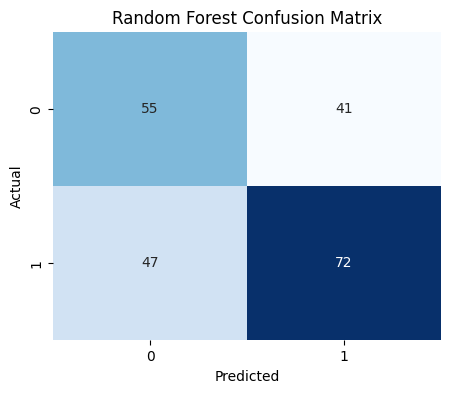

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_y_pred = rf.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# Print accuracy and classification report
print(f"Random Forest Test accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:")
print(rf_report)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues',cbar=False,
    xticklabels=['0', '1'], yticklabels=['0', '1'])  # Specify the order of labels here
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


K-Nearest Neighbors Test accuracy: 0.64
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        high       0.59      0.62      0.61        96
         low       0.68      0.66      0.67       119

    accuracy                           0.64       215
   macro avg       0.64      0.64      0.64       215
weighted avg       0.64      0.64      0.64       215



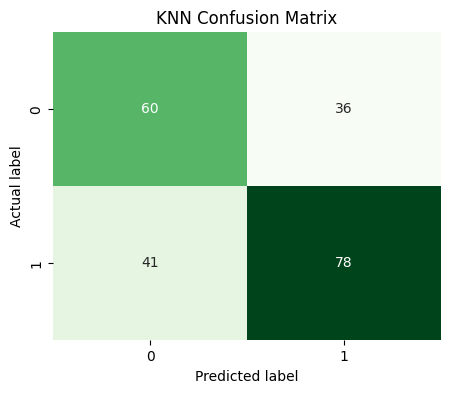

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
knn_y_pred = knn.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

# Print accuracy and classification report
print(f"K-Nearest Neighbors Test accuracy: {knn_accuracy:.2f}")
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap='Greens', cbar=False,
    xticklabels=['0', '1'], yticklabels=['0', '1'])  # Specify the order of labels here
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Decision Tree Test accuracy: 0.59
Decision Tree Classification Report:
              precision    recall  f1-score   support

        high       0.54      0.57      0.56        96
         low       0.64      0.61      0.62       119

    accuracy                           0.59       215
   macro avg       0.59      0.59      0.59       215
weighted avg       0.59      0.59      0.59       215



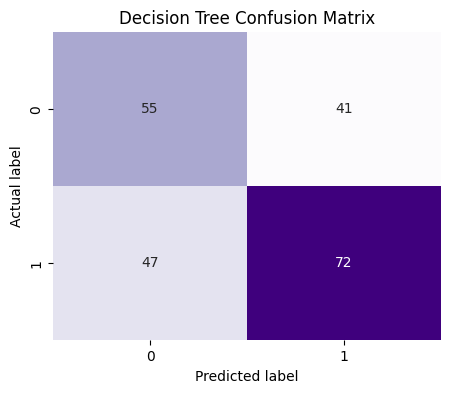

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
dt_y_pred = dt.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

# Print accuracy and classification report
print(f"Decision Tree Test accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:")
print(dt_report)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap='Purples',cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])  # Specify the order of labels here
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Gaussian Naive Bayes Test accuracy: 0.44
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

        high       0.44      0.91      0.59        96
         low       0.44      0.06      0.10       119

    accuracy                           0.44       215
   macro avg       0.44      0.48      0.35       215
weighted avg       0.44      0.44      0.32       215



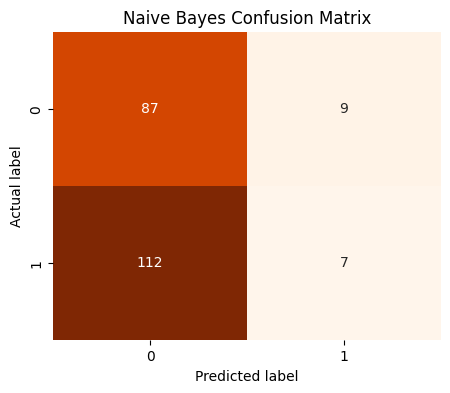

In [8]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
nb_y_pred = nb.predict(X_test)

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_report = classification_report(y_test, nb_y_pred, zero_division=0)

# Print accuracy and classification report
print(f"Gaussian Naive Bayes Test accuracy: {nb_accuracy:.2f}")
print("Gaussian Naive Bayes Classification Report:")
print(nb_report)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap='Oranges',cbar=False, 
            xticklabels=['0', '1'], yticklabels=['0', '1'])  # Specify the order of labels here
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Logistic Regression Accuracy: 0.58
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72       119
           1       0.88      0.07      0.13        96

    accuracy                           0.58       215
   macro avg       0.72      0.53      0.43       215
weighted avg       0.71      0.58      0.46       215



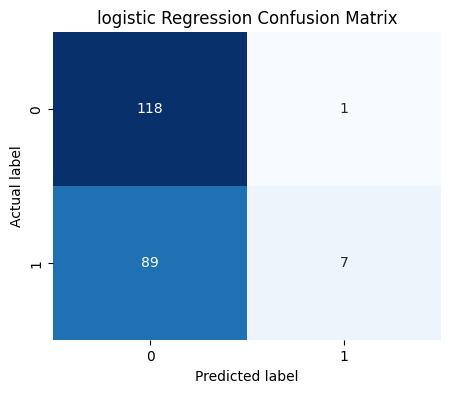

In [9]:
from sklearn.linear_model import LogisticRegression

# Convert mean_salary to binary (above_median = 1, below_median = 0)
median_salary = data_filled['mean_salary'].median()
data_filled['salary_binary'] = np.where(data_filled['mean_salary'] >= median_salary, 1, 0)
y_bin = data_filled['salary_binary']

# Split the binary outcome data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_bin, y_train_bin)

# Predictions
y_pred_log = log_reg.predict(X_test_bin)

# Evaluation
accuracy_log = accuracy_score(y_test_bin, y_pred_log)
cm_log = confusion_matrix(y_test_bin, y_pred_log, labels=[0, 1])
report_log = classification_report(y_test_bin, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

print("Logistic Regression Classification Report:")
print(report_log)


# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues',cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])  # Specify the order of labels here
plt.title('logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# Regression 

<strong> Regression analysis </strong> is a powerful statistical method that allows you to examine the relationship between two or more variables of interest. In the context of supervised learning:

<strong>Linear Regression </strong> is used to model the relationship between a scalar dependent variable and one or more independent variables. The goal is to find a linear function that predicts the dependent variable value as accurately as possible from the independent variable(s).

<strong>Input Parameters (Features)</strong>: Independent variable(s) used to predict the outcome.
<strong>Output Parameter (Target)</strong>: The dependent variable that you’re trying to predict, which should be continuous.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming data_cleaned is our dataframe and is already loaded
X = data_filled[['population_size']]  # Feature
y = data_filled['mean_salary']        # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"Linear Regression R^2: {r2_lin:.2f}")


Linear Regression MSE: 97193318.55
Linear Regression R^2: -0.02


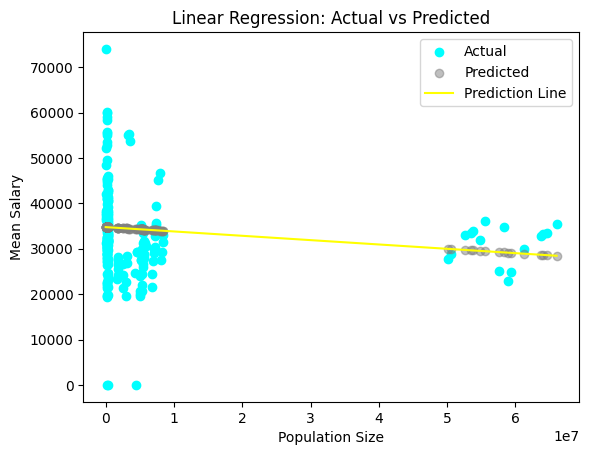

In [11]:
# Plot actual vs predicted data

# For plotting the regression line, sort the X_test and corresponding y_pred_lin
sorted_idx = np.argsort(X_test.iloc[:, 0])
X_test_sorted = X_test.iloc[sorted_idx]
y_pred_lin_sorted = y_pred_lin[sorted_idx]


plt.scatter(X_test, y_test, color='aqua', label='Actual')
plt.scatter(X_test, y_pred_lin, color='gray', alpha=0.5, label='Predicted')
plt.plot(X_test_sorted, y_pred_lin_sorted, color='yellow', label='Prediction Line')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Population Size')
plt.ylabel('Mean Salary')
plt.legend()
plt.show()

# Prediction 

In [12]:
# Sample input data
sample_input = {'population_size': [2000000]}# Example population size
sample_df = pd.DataFrame(sample_input)

# Initialize the models (Replace these with your actual trained model variables)
rf = RandomForestClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
log_reg = LogisticRegression().fit(X_train_bin, y_train_bin)

# Predictions
rf_prediction = rf.predict(sample_df)
knn_prediction = knn.predict(sample_df)
dt_prediction = dt.predict(sample_df)
nb_prediction = nb.predict(sample_df)
log_reg_prediction = log_reg.predict(sample_df)

# Output predictions
print(f"Random Forest Prediction: {rf_prediction[0]}")
print(f"K-Nearest Neighbors Prediction: {knn_prediction[0]}")
print(f"Decision Tree Prediction: {dt_prediction[0]}")
print(f"Gaussian Naive Bayes Prediction: {nb_prediction[0]}")
print(f"Logistic Regression Prediction: {log_reg_prediction[0]}")


Random Forest Prediction: 31158.0
K-Nearest Neighbors Prediction: 27839.0
Decision Tree Prediction: 31158.0
Gaussian Naive Bayes Prediction: 0.0
Logistic Regression Prediction: 0
